### Additional Read:

####  Detect piano chord using the pitch signal
Theoritically we have 12 different roots available in piano sounds, from C to B. So 12 times 100 possible chords per octave give us a rough total of 1200 chords on the piano. Hence, we can play these 1200 chords in 7 different octaves on a piano, which results in a total of 8400 possible chords.[From Quora]. Keeping the output to one hot vector of length 8400 will reduce the computation and the network has to be trained and generalized to detect the pitch and play its corresponding chord. 

# Rhythm of Brain
#### 5.3 Neural Network Architecture

There are two networks designed to serve the purpose, 1. Baseline autoencoder model for music synthesize (wavenet_nb_train.ipynb and [1] ) and a advanced convolution model with multi layered convolution and maxpool operations to detect pitch(detect_pitch.ipynb) in signal. Due to insufficient hardware and memory resources the idea based on baseline wavenet model was dropped and the project is carried further focusing  only on pitch detection model.   

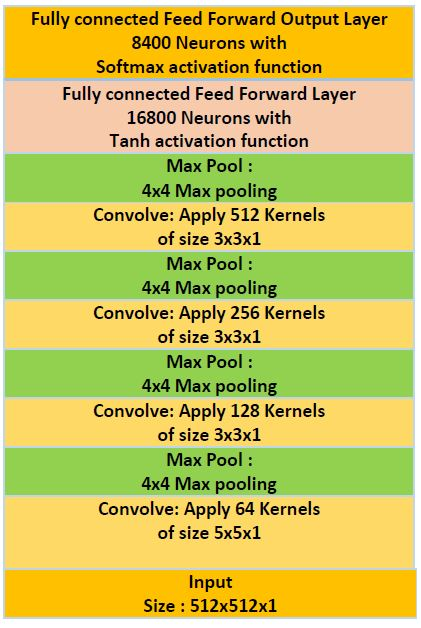

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:/Users/Saran/Desktop/"
Image(filename = PATH + "pitch_detect.JPG", width=300, height=400)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import division
import numpy as np
import tensorflow as tf
import scipy.io   
import matplotlib.pyplot as plt
import os
import sys
import random
import scipy.io.wavfile
import IPython
%matplotlib inline


In [2]:

#-------------------------------------Add working directory to path-----------------------------------------------

cwd = os.getcwd()
sys.path.append(cwd)

sys.path.insert(0,'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet')
sys.path.insert(0,'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset')
sys.path.insert(0,'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/clipped_data')

# Save the variables in a log/directory during training
save_path = "C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/wavenet_logs"
if not os.path.exists(save_path):
    os.makedirs(save_path)



Sample rate1 44100  data size1 (96271,)  duration1: 2.183015873015873 seconds
Sample rate2 44100  data size2 (95642,)  duration2: 2.1687528344671203 seconds
DATA SIZES ARE DIFFERENT NEEDS TO BE CONSIDERED


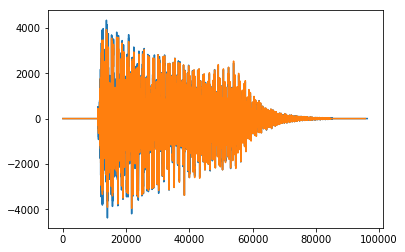

In [3]:

# -------------------------Get some insights and information about the training data-----------------------------


# Location of the wav file in the file system.
fileName1 = 'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/dataset/UMAPiano-DB-Poly-1/UMAPiano-DB-A0-NO-F.wav'
fileName2 = 'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/dataset/UMAPiano-DB-Poly-1/UMAPiano-DB-A0-NO-M.wav'

# Loads sample rate (bps) and signal data (wav). 
sample_rate1, data1 = scipy.io.wavfile.read(fileName1)
sample_rate2, data2 = scipy.io.wavfile.read(fileName2)


# Print in sdout the sample rate, number of items and duration in seconds of the wav file
print("Sample rate1 %s  data size1 %s  duration1: %s seconds"%(sample_rate1,data1.shape,len(data1)/sample_rate1))
print("Sample rate2 %s  data size2 %s  duration2: %s seconds"%(sample_rate2,data2.shape,len(data2)/sample_rate2))
print("DATA SIZES ARE DIFFERENT NEEDS TO BE CONSIDERED")

plt.plot(data1)
plt.plot(data2)
plt.show()




Max sized file is 356.wav
Minimum sized file is 722.wav
Maximum size 181718 
Minimum size 39224 
Dataset is in C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset and all the files are numbered
Sample rate3 44100  data size3 (181718,)  duration3: 4.120589569160998 seconds
Sample rate4 44100  data size4 (39224,)  duration4: 0.8894331065759638 seconds
Data sizes are different
0
0
0
0


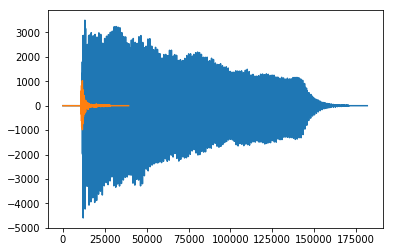

Safe to clip first 10000 sample points out from the array and convert them back to .wav file


In [4]:
"""
#---------------------------------------------------------------------------------------------------------------

# Split the data into train,validation and test 

dataset_path = 'E:/!CogSci/!!!WS2017/Edge_computing/Wavenet/dataset/UMAPiano-DB-Poly-1'
dir_list_len = len(os.listdir(dataset_path))
print("Number of files in the Dataset ",dir_list_len)
# training_data_arr = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]


# Change file names to be easily recognized


def change_filenames(dataset_path):
    
    i = 0  # Counter and target filename
    
    for old_name in os.listdir(dataset_path):
        # os.rename(dataset_path + "/" + old_name, dataset_path + "/" + str(i) + '.wav')
        os.rename(os.path.join(dataset_path, old_name), os.path.join(dataset_path, str(i) + '.wav'))
        i+=1    

change_filenames(dataset_new)
list_sizes_new =[]  

for data_new in os.listdir(dataset_new):
    _,data_new = scipy.io.wavfile.read(dataset_new+'/'+data_new)
    list_sizes_new.append(data_new.shape[0])
print("Maximum size %s and the music file is",np.argmax(list_sizes_new))
"""

dataset_new = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset'
list_sizes =[]  
for datas in os.listdir(dataset_new):
    _,data_new = scipy.io.wavfile.read(os.path.join(dataset_new,datas))
    list_sizes.append(data_new.shape[0])
    if data_new.shape[0]== 39224:
        print("Minimum sized file is",datas)
    if data_new.shape[0] == 181718:
        print("Max sized file is",datas)

print("Maximum size %s "%(max(list_sizes)))
print("Minimum size %s "%(min(list_sizes)))

print("Dataset is in C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset and all the files are numbered")

# -------------------------Get some insights and information about the max and min sized data-----------------------------

# Location of the wav file in the file system.
fileName3 = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset/356.wav'
fileName4 = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset/722.wav'
# Loads sample rate (bps) and signal data (wav). 
sample_rate3, data3 = scipy.io.wavfile.read(fileName3)
sample_rate4, data4 = scipy.io.wavfile.read(fileName4)


# Print in sdout the sample rate, number of items and duration in seconds of the wav file
print("Sample rate3 %s  data size3 %s  duration3: %s seconds"%(sample_rate3,data3.shape,len(data3)/sample_rate3))
print("Sample rate4 %s  data size4 %s  duration4: %s seconds"%(sample_rate4,data4.shape,len(data4)/sample_rate4))
print("Data sizes are different")
# Plot the wave file and get insight about the sample. Here we test first 100 samples of the wav file

# fileName_arr = np.fromfile(open(fileName),np.int16)[0:96270]

print(data3[10000])
print(data4[10000])
print(data3[180000])
print(data4[29000])


plt.plot(data3)
plt.plot(data4)
plt.show()

print("Safe to clip first 10000 sample points out from the array and convert them back to .wav file")

Sample rate 44100  data size (56293,)  duration: 1.2764852607709751 seconds


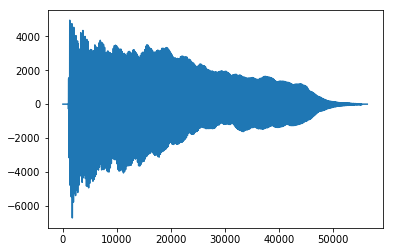

In [5]:
#----------------------- .WAV training data preprocessing steps ----------------------

# Clip the first 10000 values which doesn't show any informations 
"""
def clip_write_wav(dataset_path):
    
    i = 0  # Counter and target filename
    
    for datas in os.listdir(dataset_path):
        
        _,data = scipy.io.wavfile.read(dataset_path+'/'+datas)
        data= data[:-10000]  # Slice out last 10000 elements in data
        data= data[10000:] # Slice out first 10000 elements in the data
        
        #IF ADD NOISE DO it here in the data which is an array.
        
        scipy.io.wavfile.write('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/%i.wav'%i, 44100, data) 
        
        i+=1 
        
    
 """

_dataset = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/dataset'
_target = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data'
clip_points = 10000
_sampling_rate = 44100
# clip_write_wav(_dataset)


# Verify required informations again
sample_rate3, data3 = scipy.io.wavfile.read('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/3.wav')
print("Sample rate %s  data size %s  duration: %s seconds"%(sample_rate3,data3.shape,len(data3)/sample_rate3))
plt.plot(data3)
plt.show()

#Play the audio inline

IPython.display.Audio('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/3.wav')

# Reshape the data as square matrix of 310*310 of size 96100
# data = data.reshape(310,310)
# print("Reshaped data",np.shape(data))

# Repeat the steps for all files in the dataset
               


In [6]:
_dataset_new = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data'
_list_sizes =[]  
for datas in os.listdir(_dataset_new):
    _,_data_new = scipy.io.wavfile.read(os.path.join(_dataset_new,datas))
    _list_sizes.append(_data_new.shape[0])
    if _data_new.shape[0]== 19224:
        print("Minimum sized file is",datas)
    if _data_new.shape[0] == 161718:
        print("Max sized file is",datas)
# print(_list_sizes)
print("Maximum size %s "%(max(_list_sizes)))
print("Minimum size %s "%(min(_list_sizes)))
print("Notice that io read and write doesnt preserve the index of files in the directory")

Max sized file is 286.wav
Minimum sized file is 693.wav
Maximum size 161718 
Minimum size 19224 
Notice that io read and write doesnt preserve the index of files in the directory


In [7]:
# Upsample the data # 512x512 = 262144

target_folder = 'C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data'

def write_wav(dataset_path,target_folder):
    
    i=0

    for datas in os.listdir(dataset_path):
        
        _,data = scipy.io.wavfile.read(dataset_path+'/'+datas)
        
        #IF ADD NOISE DO it here in the data which is an array.
        
        scipy.io.wavfile.write('%s/%i.wav'%(target_folder,i), 88000, data) 
        
        i+=1

"""*************UNCOMMENT FOR FIRST TIME RUN **************"""
# write_wav(_dataset_new,target_folder)


'*************UNCOMMENT FOR FIRST TIME RUN **************'

Max sized file is 208.wav and sampling rate 88000
Minimum sized file is 660.wav and sampling rate 88000
Maximum size 161718 
Minimum size 19224 
Sample rate 88000  data size (49966,)  duration: 0.5677954545454545 seconds


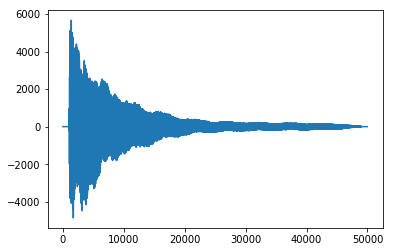

In [8]:
sampled_datapath ='C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data'

_list_sizes =[]  
for datas in os.listdir(sampled_datapath):
    sampling_rate,_data_new = scipy.io.wavfile.read(os.path.join(sampled_datapath,datas))
    _list_sizes.append(_data_new.shape[0])
    if _data_new.shape[0]== 19224:
        print("Minimum sized file is %s and sampling rate"%datas,sampling_rate)
    if _data_new.shape[0] == 161718:
        print("Max sized file is %s and sampling rate"%datas,sampling_rate)
# print(_list_sizes)
print("Maximum size %s "%(max(_list_sizes)))
print("Minimum size %s "%(min(_list_sizes)))


# Verify required informations again
sample_rate5, data5 = scipy.io.wavfile.read('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data/3.wav')
print("Sample rate %s  data size %s  duration: %s seconds"%(sample_rate5,data5.shape,len(data5)/sample_rate5))
plt.plot(data5)
plt.show()

#Play the audio inline

IPython.display.Audio('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/clipped_data/3.wav')

In [9]:
# Each audio file should have 262144 entries. Extend them all with zeros in the tail
# Convert all audio files as matrices of 512x512 shape

def get_training_data(dataset_path):
    
    training_data  = []
    
    for datas in os.listdir(dataset_path):
        
        _,data = scipy.io.wavfile.read(dataset_path+'/'+datas)
        # Add Zeros at the tail until 262144
        temp_zeros = [0]*262144
        # print("Unpadded data len",len(data))
        # print(len(temp_zeros))
        temp_zeros[:len(data)] = data  # Slice temp_zeros and add the data into the slice
        # print("Padded data len",len(temp_zeros))
        # print(np.shape(temp_zeros))
        # Reshape the data as square matrix of 403*403 of size 162409
        data_ = np.reshape(temp_zeros,(512,512))
        training_data.append(data_)
    
    return training_data

training_data = get_training_data('C:/Users/Saran/!!!!!!!!!!!!!Edge_computing/Wavenet/upsampled_data')

print(training_data[0].shape)

# Expand the dims # The third dimension represents number of channels

for i in range(len(training_data)):
    training_data[i] = training_data[i][:,:,np.newaxis]
print(training_data[0].shape)
   


(512, 512)
(512, 512, 1)


In [10]:
#Leaky relu function

def leaky_relu(x,alpha):
    return tf.nn.relu(x) - alpha * tf.nn.relu(-x)


#### NETWORK ARCHITECTURE: Multi Layered Convolution Neural net with Max pool operations


##### Helper Functions to Construct the network

###### convolution - Perform Convolution operation
###### max_pooling - Reduce the dimensions of the input using 4*4 max pooling
###### ffnn - Fully connected feedforward layer(FFNN) with tanh activation function
###### output_layer - Fully connected FFNN with softmax activation function

In [14]:

def convolution(inp, kernel_shape,_strides, bias_shape):
    
    """
        Args:
            inp(array) - Image or output from previous layer 
            weight_shape(list) = Filter shape [kernel_shape,num_fliters ] e.g (5,5,3,16) Convolution layer 1
            bias_shape(int) = Shape of bias corresponds to number of neurons
        Returns:
            output(array) - batch_norm(leaky_relu(convolution))
    
    """  
    
    # Initialize weight variable
    
    incoming = kernel_shape[0]*kernel_shape[1]*kernel_shape[2]  
    weight_init = tf.random_normal_initializer(stddev = (2.0/incoming)**0.5) 
    W = tf.get_variable("W", kernel_shape, initializer = weight_init)
    
    # Keep track of summary of weights for plot
    #if plot:    
        # tf.filter_summary(W, kernel_shape)
    
    # Initialize bias variable
    bias_init = tf.constant_initializer(value = 0)
    b = tf.get_variable("b", bias_shape, initializer = bias_init)
    
    # Convolve
    convolve = tf.nn.convolution(inp, W, strides = _strides, padding = 'SAME') 
    logits = tf.nn.bias_add(convolve,b)
    print(logits)
    print(tf.shape(logits))
    
    # Apply leaky_relu activation function
    _output = leaky_relu(logits,alpha = 0.1)
    
    output = tf.contrib.layers.batch_norm(_output)
    
    return output


# ------------------------------------Maxpool Operation ------------------------------------------------

def max_pooling(inp):
    
    """
        Args:
            inp(array) = Output from convolutoin
        Return:
            output(array) - Compressed feature map of convolved image/signal from previous layer
        """
    output = tf.nn.max_pool(inp, ksize = [1,4,4,1], strides = [1,2,2,1], padding = 'SAME')
    
    return output


# -------------------- Fully connected Feed forward layer-----------------------------------

def ffnn(inp, weight_shape,bias_shape):
    """
        Args:
            inp(array) - Flattened output from previous layer
            weight_shape(array) - Array of weights between layers
            bias(int) - Number of bias (depends on number of neurons in the layer)
            
        Returns:
            output(array) - tanh of logits - (inp*weights)+bias 
            
        """
    weight_init = tf.random_normal_initializer(stddev = (2.0/weight_shape[0])**0.5)
    bias_init = tf.constant_initializer(value = 0)
    W1 = tf.get_variable("W1", weight_shape,initializer = weight_init)
    b1 = tf.get_variable("b1", bias_shape, initializer = bias_init)
    
    logits = tf.matmul(inp, W1) + b1
    output = tf.nn.tanh(logits)
    return output


# ------------------------Output layer with softmax activation function-----------------------------

def output_layer(inp,weight_shape, bias_shape):
    """
        Args:
            inp(array) - Output from ffnn1 layer
            weight_shape(array) - Array of weights between layers
            bias(int) - Number of bias (depends on number of neurons in the layer)
            
        Returns:
            output(array) - sigmoid of logits
            
        """
    weight_init = tf.random_normal_initializer(stddev = (2.0/weight_shape[0])**0.5)
    bias_init = tf.constant_initializer(value = 0)
    W2 = tf.get_variable("W2", weight_shape,initializer = weight_init)
    b2 = tf.get_variable("b2", bias_shape, initializer = bias_init)
    
    logits = tf.matmul(inp, W2) + b2
    output = tf.nn.softmax(logits,dim=-1)
    return output

##### Build the network using helper functions

In [19]:

def cnn(inp):
    
    # Flatten the input image
    inp = tf.reshape(inp, shape=[-1,512,512,1])

    # Scope variables that operates along with tf.get_variable
    
    #Layer 1
    with tf.variable_scope("conv1"):
        conv1 = convolution(inp,kernel_shape= [5,5,1,64],_strides = [2,2],bias_shape =[64])
        print(conv1)
        #Layer 2
        max_pool1 = max_pooling(conv1)
        print(max_pool1)
    
    # Layer 3
    with tf.variable_scope("conv2"):
        conv2 = convolution(max_pool1, kernel_shape= [3,3,64,128],_strides = [2,2],bias_shape=[128])
        print(conv2)
        #Layer 4
        max_pool2 = max_pooling(conv2)
        print(max_pool2)
    
    # Layer 5
    with tf.variable_scope("conv3"):
        conv3 = convolution(max_pool2,kernel_shape= [3,3,128,256],_strides = [2,2],bias_shape=[256])
        print(conv3)
        #Layer 6
        max_pool3 = max_pooling(conv3)
        print(max_pool3)
        
    # Layer 7
    with tf.variable_scope("ffnn1"):
        
        """Flatten the output from max_pool2 and get the dimensions as it can be feed forward through the network"""
            
        dimensions = 512*8*8 # = 32768 size(flattened(maxpool3'ed))
        
        
        max_pool3_flat = tf.reshape(max_pool3,[-1,dimensions])
        
        ffnn1 = ffnn(max_pool3_flat,[dimensions,ffnn1_neurons],[ffnn1_neurons])
        print(ffnn1)
    # Layer 8
    with tf.variable_scope("output"):
        output = output_layer(ffnn1,[ffnn1_neurons,num_classes],[num_classes])
        print(output)
        
    return output



#### 5.4 Training Methodology 

The network can be trained using supervised stochastic training protocol (Note: Input training data is yet to be labelled). Performing K- means clustering on data helps to classify the input data and label them accordingly(Not performed). To complete the network, i used random target values for inputs which should be replaced with original targets found using K- means clustering. The error measure between input and desired targets is done using cross entropy. Network can be optimized using Momentum based gradient descent or Adam optimizer or Gradient descient by default.   

In [15]:
# -------------------------------Compute Loss, Optimize the error and evaluate ---------------------------

def loss(output, y):
    
    # Calculate mean cross entropy for each instance of mini-batch
    cross_entropies = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = output, labels = y)
    
    # Calculate mean cross entropy for the mini-batch
    mean_cross_entropy = tf.reduce_mean(cross_entropies)
    
    return mean_cross_entropy
    
def optimize(loss, _momentum = False, _adam = False):
    
    if _momentum:
        optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    if _adam:
        optimizer = tf.train.AdamOptimizer(learning_rate, beta1, beta2,epsilon,use_locking = False, name = 'Adam')
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
    return training_op


def evaluate(output, y):
    correct_prediction = tf.equal(tf.argmax(output,1),y)
    #correct_prediction = tf.equal(tf.argmax(output,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    return accuracy

##### Training Cycle

In [16]:
# Create new instance of graph 

tf.reset_default_graph() 

#-------------------------------Train the network-------------------------------------------

#Hyperparameters
aud_size = 512
num_channels = 1   # single channel
num_classes = 8400
ffnn1_neurons = 16800  # Double the size of # of classes 

learning_rate = 0.01
num_epochs = 1
batch_size = 1
total_batches = 300
momentum = 0.9     # Momentum based optimization parameter
beta1,beta2,epsilon = 0.9,0.999,1e-08   # Adam optimizer parameters


#Placeholder for input audio array
# Shape is set to "None" since it may hold arbitrary number of audios
x = tf.placeholder(tf.float32, shape=[None, aud_size, aud_size, num_channels], name='x') 

#Placeholder for true labels/pitches
y = tf.placeholder(tf.int64, shape= [None]) 


# -------------------------------------------Training Cycle---------------------------------------------------

training_step = tf.Variable(0, name = 'training_step')
output = cnn(x)
cost = loss(output, y)
training_op = optimize(cost,_momentum= False)
evaluation_op = evaluate(output, y)
validate_step = 1

#Plot variables

training_loss,validation_accuracy = [],[]

# # Configure session to use BFC allocator, that prevent Resource Exhaus error: OOM error
# config = tf.ConfigProto()
# config.gpu_options.allocator_type = 'BFC'
# config.gpu_options.per_process_gpu_memory_fraction = 0.80
# # config.gpu_options.allow_growth = True

    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):

        avg_cost = 0

        # Loop over all batches

        for i in range(total_batches):
            
            # Get random data from training_data 
            train_idx = np.random.randint(0,len(training_data)-1)
            train_data = training_data[train_idx]
            train_data = np.expand_dims(train_data,axis = 0)
            # train_data = array(train_data).reshape(1,512,512,1)
            
            # REPLACE train_data_labels WITH ACTUAL PITCH DETECTION OUTPUT . YET TO BE PERFORMED
            # HERE I FEED RANDOM TARGETS FOR INPUTS JUST TO TEST THE TRAINING GRAPH AND CHECK ONE TRAINING CYCLE.
            train_data_labels = np.zeros(num_labels)
            train_data_labels[random.randrange(0,num_classes)] = 1 # Set random index to one 
            
            
            minibatch_x, minibatch_y = train_data,train_data_labels

            # Fit training using batch data
            feed_dict = {x:minibatch_x, y:minibatch_y}
            sess.run(training_op, feed_dict = feed_dict)

            # Compute loss
            _cost = sess.run(cost, feed_dict = feed_dict)
            training_loss.append(_cost)
            # avg_cost +=_cost/total_batches
            print(_cost)
            
        # total_avg_cost.append(avg_cost)
        
        # print("Average training cost",avg_cost)
        
        # Display logs per epoch step

        if epoch %validate_step == 0:
            val_idx = np.random.randint(0,len(training_data)-1)
            val_data = training_data[val_idx]
            val_data = np.expand_dims(val_data[val_idx],axis = 0)
            
            # REPLACE train_data_labels WITH ACTUAL PITCH DETECTION . YET TO BE PERFORMED
            val_data_labels = np.zeros(num_labels)
            val_data_labels[random.randrange(0,num_classes)] = 1 # Set random index to one 
            
            val_batch_x,val_batch_y = val_data,val_data_labels
            val_feed_dict = {x: val_batch_x, y: val_batch_y}
            _accuracy = sess.run(evaluation_op,feed_dict=val_feed_dict)
            validation_accuracy.append(_accuracy)       
            print("Validation Error:", (1- _accuracy))


    print("----------------------- Optimization finished-----------------------------")
    # print("Average training cost ",np.sum(total_avg_cost)/num_epochs)
    # print("Average validation accuracy",np.sum(validation_accuracy)/num_epochs)
        

    # ---------------------------------Test Model----------------------------------------
    # HAS TO BE PERFORMED IN DATA which the model has never seen during training or validation
    
    test_idx = np.random.randint(0,len(training_data)-1)
    test_data = training_data[test_idx]
    test_data = np.expand_dims(test_data[test_idx],axis = 0)
    test_batch_x,test_batch_y = test_data,test_data
    test_feed_dict = {x: test_batch_x, y: test_batch_y}
    accuracy = sess.run(evaluation_op, feed_dict = test_feed_dict)

    print("Test accuracy:", accuracy)

Tensor("conv1/BiasAdd:0", shape=(?, 256, 256, 64), dtype=float32)
Tensor("conv1/Shape:0", shape=(4,), dtype=int32)
Tensor("conv1/BatchNorm/FusedBatchNorm:0", shape=(?, 256, 256, 64), dtype=float32)
Tensor("conv1/MaxPool:0", shape=(?, 128, 128, 64), dtype=float32)
Tensor("conv2/BiasAdd:0", shape=(?, 64, 64, 128), dtype=float32)
Tensor("conv2/Shape:0", shape=(4,), dtype=int32)
Tensor("conv2/BatchNorm/FusedBatchNorm:0", shape=(?, 64, 64, 128), dtype=float32)
Tensor("conv2/MaxPool:0", shape=(?, 32, 32, 128), dtype=float32)
Tensor("conv3/BiasAdd:0", shape=(?, 16, 16, 256), dtype=float32)
Tensor("conv3/Shape:0", shape=(4,), dtype=int32)
Tensor("conv3/BatchNorm/FusedBatchNorm:0", shape=(?, 16, 16, 256), dtype=float32)
Tensor("conv3/MaxPool:0", shape=(?, 8, 8, 256), dtype=float32)
Tensor("conv4/BiasAdd:0", shape=(?, 4, 4, 512), dtype=float32)
Tensor("conv4/Shape:0", shape=(4,), dtype=int32)
Tensor("conv4/BatchNorm/FusedBatchNorm:0", shape=(?, 4, 4, 512), dtype=float32)
Tensor("conv4/MaxPool:0"

ResourceExhaustedError: OOM when allocating tensor with shape[524288,16800] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[Node: ffnn1/W1/Initializer/random_normal/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, _class=["loc:@ffnn1/W1"], dtype=DT_FLOAT, seed=0, seed2=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ffnn1/W1/Initializer/random_normal/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'ffnn1/W1/Initializer/random_normal/RandomStandardNormal', defined at:
  File "c:\users\saran\anaconda3\envs\tensor\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\saran\anaconda3\envs\tensor\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-3252d89f3671>", line 32, in <module>
    output = cnn(x)
  File "<ipython-input-12-c0ab52623a60>", line 52, in cnn
    ffnn1 = ffnn(max_pool4_flat,[dimensions,ffnn1_neurons],[ffnn1_neurons])
  File "<ipython-input-14-1ad1ccc2ce17>", line 129, in ffnn
    W1 = tf.get_variable("W1", weight_shape,initializer = weight_init)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1262, in get_variable
    constraint=constraint)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1097, in get_variable
    constraint=constraint)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 435, in get_variable
    constraint=constraint)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 404, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 806, in _get_single_variable
    constraint=constraint)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variables.py", line 229, in __init__
    constraint=constraint)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variables.py", line 323, in _init_from_args
    initial_value(), name="initial_value", dtype=dtype)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 780, in <lambda>
    shape.as_list(), dtype=dtype, partition_info=partition_info)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\init_ops.py", line 269, in __call__
    shape, self.mean, self.stddev, dtype, seed=self.seed)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\random_ops.py", line 76, in random_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\gen_random_ops.py", line 432, in _random_standard_normal
    seed2=seed2, name=name)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\users\saran\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[524288,16800] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[Node: ffnn1/W1/Initializer/random_normal/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, _class=["loc:@ffnn1/W1"], dtype=DT_FLOAT, seed=0, seed2=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ffnn1/W1/Initializer/random_normal/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



#### 6 Error Information and Further development

The network architecture finished complete cycle of the graph. But in training phase, while initialising trainable variables(weights/biases), the network throws resource exhaution error. Problem araised while the program tried to initialize weights between final convolution layer to the first fully connected layer of size [524288x16800] (8.8GB) which is lot higher than the available cpu memory(4GB). Hence, to resolve this error, train the model using cloud engines is optimal.
The problem to be adressed, <br> 1) classify the available data in small batches using K- means clustering and label them accordingly to use them as targets for the network. <br> 2)The dimensions of fully connected feed forward layer will be reduced further, then execute the code with atleast 8GB of RAM. Also, very low dimensional output(2x2x512) from the final max pool needs to be considered. May tuned further to 8x8x512 that assumed to provide better performance. But anything can be confirmed only after first successful run.
<br> 3) Test run the model using Neural compute stick.

#### References

1.Neural Audio Synthesis of Musical Notes with WaveNet Autoencoders https://arxiv.org/pdf/1704.01279.pdf
<br>
2.Rhythmic brain waves: Fluctuations in electrical activity may allow brain to form thoughts and memories. https://linkinghub.elsevier.com/retrieve/pii/S0896627316309606
<br>
3.Piano Dataset  http://extras.springer.com/2013/978-1-4614-7475-3